In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv("./data/final01.csv", encoding= 'utf-8-sig', thousands=',')

In [22]:
df.head(3)

,danjigubn,sedesu,nambang,sigog,siheg,gukag,eill,guard,danjicode,clean,...,donli,danjiname,amenitiesCnt,areadaprice,market,school,station,bank,cafe,hospital
0,주상복합,176,개별난방,SK건설,SK건설,(주)아스타아이비에스,6.0,4.0,A13527018,1.0,...,도곡동,양재SK허브프리모,1,4395.0,5,4,2,40,107,91
1,주상복합,155,개별난방,대우건설,대우건설,NaN,3.0,2.0,A13527001,2.0,...,도곡동,도곡동양재디오빌,1,3480.0,6,4,2,43,122,98
2,아파트,644,개별난방,신동아건설,논현동공무원아파트재건축조합,광인산업,6.0,8.0,A13501004,7.0,...,논현동,논현신동아,3,7701.0,5,0,2,48,174,294


In [23]:
df = df.dropna(thresh=26)

In [24]:
mask = df['danjigubn'].isin(['아파트'])

In [25]:
df = df[mask]

In [26]:
gu_df = df['doro'].str.split(' ').str[1]
gu_df = pd.DataFrame(gu_df)

In [27]:
gu_df.columns = ["gu"]

In [28]:
df = pd.concat([df, gu_df], axis=1)

In [29]:
df.head(1)

,danjigubn,sedesu,nambang,sigog,siheg,gukag,eill,guard,danjicode,clean,...,danjiname,amenitiesCnt,areadaprice,market,school,station,bank,cafe,hospital,gu
2,아파트,644,개별난방,신동아건설,논현동공무원아파트재건축조합,광인산업,6.0,8.0,A13501004,7.0,...,논현신동아,3,7701.0,5,0,2,48,174,294,강남구


In [30]:
df.head(2)

,danjigubn,sedesu,nambang,sigog,siheg,gukag,eill,guard,danjicode,clean,...,danjiname,amenitiesCnt,areadaprice,market,school,station,bank,cafe,hospital,gu
2,아파트,644,개별난방,신동아건설,논현동공무원아파트재건축조합,광인산업,6.0,8.0,A13501004,7.0,...,논현신동아,3,7701.0,5,0,2,48,174,294,강남구
3,아파트,168,개별난방,대우건설,플러스하우징,국제경보산업(주),13.0,6.0,A13508003,9.0,...,대우디오빌플러스,1,3141.0,8,0,3,70,317,313,강남구


In [31]:
ipji = df[['gu', 'areadaprice','market','school','station','bank', 'cafe', 'hospital','amenitiesCnt']]

In [32]:
ipji_gangnam = ipji[ipji['gu']=='강남구']

In [33]:
ipji_gangnam_num = ipji_gangnam.drop(['gu'], axis=1)

In [34]:
ipji_gangnam_num

,areadaprice,market,school,station,bank,cafe,hospital,amenitiesCnt
2,7701.0,5,0,2,48,174,294,3
3,3141.0,8,0,3,70,317,313,1
4,10629.0,4,5,3,6,12,11,8
5,6007.0,5,4,1,7,6,7,4
6,6752.5,4,5,2,9,10,11,3
...,...,...,...,...,...,...,...,...
168,7330.7,1,0,1,3,1,0,9
169,5232.5,5,1,0,3,19,16,6
170,6466.0,5,1,0,2,17,15,7
171,4596.3,5,1,0,3,17,14,6


In [35]:
ipji_gangnam_num_corr = ipji_gangnam_num.corr()

In [36]:
ipji_gangnam_num_corr

,areadaprice,market,school,station,bank,cafe,hospital,amenitiesCnt
areadaprice,1.000000,0.155889,0.238870,0.160069,-0.077450,-0.179588,-0.070399,0.253912
market,0.155889,1.000000,0.329392,0.362330,0.206310,0.058253,0.090367,0.014889
school,0.238870,0.329392,1.000000,0.402823,-0.010627,-0.119280,-0.007660,0.037562
station,0.160069,0.362330,0.402823,1.000000,0.335368,0.283860,0.305190,-0.061209
bank,-0.077450,0.206310,-0.010627,0.335368,1.000000,0.839102,0.708749,-0.254901
cafe,-0.179588,0.058253,-0.119280,0.283860,0.839102,1.000000,0.835276,-0.274096
hospital,-0.070399,0.090367,-0.007660,0.305190,0.708749,0.835276,1.000000,-0.235120
amenitiesCnt,0.253912,0.014889,0.037562,-0.061209,-0.254901,-0.274096,-0.235120,1.000000


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

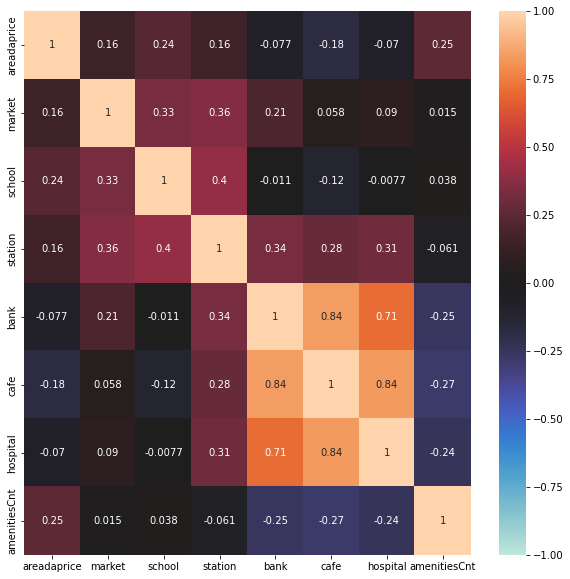

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(ipji_gangnam_num_corr, vmax=1, vmin=-1, center=0, annot=True)

In [39]:
train_ipji_gan_le = ipji_gangnam_num[~ipji_gangnam_num['areadaprice'].isnull()]
test_ipji_gan_le = ipji_gangnam_num[~ipji_gangnam_num['areadaprice'].isnull()]

In [40]:
import lightgbm as lgb

In [41]:
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits = folds)

In [42]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234
}

In [43]:
train_X = train_ipji_gan_le.drop(['areadaprice'], axis=1)
train_Y = train_ipji_gan_le['areadaprice']

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                         lgb_train,
                          valid_sets = lgb_eval,
                         num_boost_round=100,
                         early_stopping_rounds=20,
                         verbose_eval = 10)
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 7
[LightGBM] [Info] Start training from score 7735.693487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

C:\Users\sonsj\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\sonsj\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\sonsj\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' a

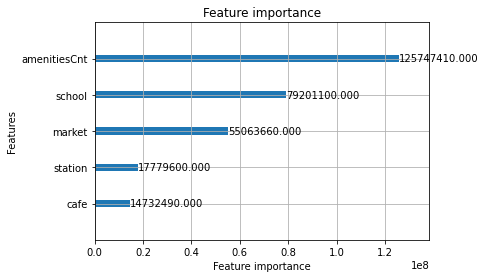

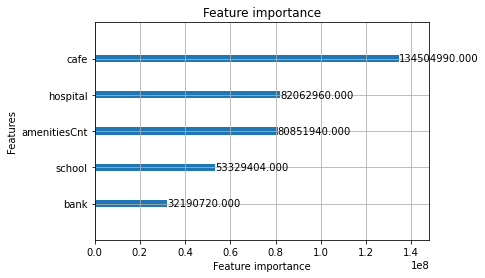

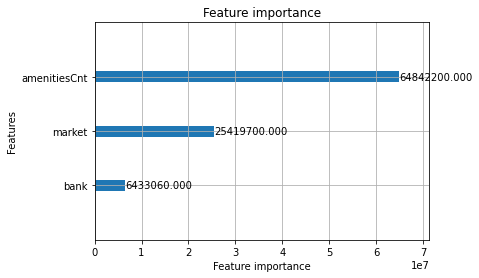

In [46]:
for model in models:
    lgb.plot_importance(model, importance_type='gain', max_num_features=5)

In [47]:
actual_pred_df = pd.DataFrame({
    "actual": train_Y,
    "pred": oof
})

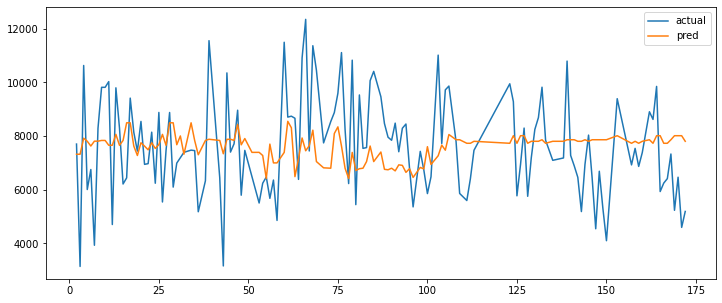

In [48]:
import matplotlib as plt

actual_pred_df.plot(figsize=(12,5))

In [49]:
ipji_seongbuk = ipji[ipji['gu']=='성북구']

In [50]:
ipji_seongbuk_num = ipji_seongbuk.drop(['gu'], axis=1)

In [51]:
ipji_seongbuk_num_corr = ipji_seongbuk_num.corr()

In [52]:
ipji_seongbuk_num_corr

,areadaprice,market,school,station,bank,cafe,hospital,amenitiesCnt
areadaprice,1.000000,0.256940,-0.065027,-0.171042,0.118106,0.112539,0.247924,0.358037
market,0.256940,1.000000,0.089846,-0.070947,0.387604,0.239802,0.346572,-0.055766
school,-0.065027,0.089846,1.000000,0.177103,-0.053844,-0.022418,-0.165096,0.029957
station,-0.171042,-0.070947,0.177103,1.000000,0.289998,0.399949,0.185739,-0.077388
bank,0.118106,0.387604,-0.053844,0.289998,1.000000,0.800325,0.823680,-0.124728
cafe,0.112539,0.239802,-0.022418,0.399949,0.800325,1.000000,0.774936,-0.044812
hospital,0.247924,0.346572,-0.165096,0.185739,0.823680,0.774936,1.000000,-0.052706
amenitiesCnt,0.358037,-0.055766,0.029957,-0.077388,-0.124728,-0.044812,-0.052706,1.000000


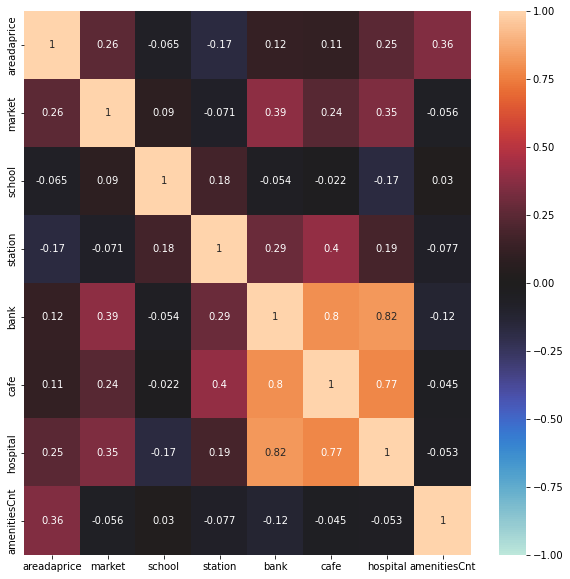

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(ipji_seongbuk_num_corr, vmax=1, vmin=-1, center=0, annot=True)

In [54]:
train_ipji_seon_le = ipji_seongbuk_num[~ipji_seongbuk_num['areadaprice'].isnull()]
test_ipji_seon_le = ipji_seongbuk_num[~ipji_seongbuk_num['areadaprice'].isnull()]

In [55]:
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits = folds)

train_X = train_ipji_seon_le.drop(['areadaprice'], axis=1)
train_Y = train_ipji_seon_le['areadaprice']
from sklearn.metrics import mean_squared_error

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                         lgb_train,
                          valid_sets = lgb_eval,
                         num_boost_round=100,
                         early_stopping_rounds=20,
                         verbose_eval = 10)
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 7
[LightGBM] [Info] Start training from score 3507.833344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

C:\Users\sonsj\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\sonsj\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\sonsj\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' a

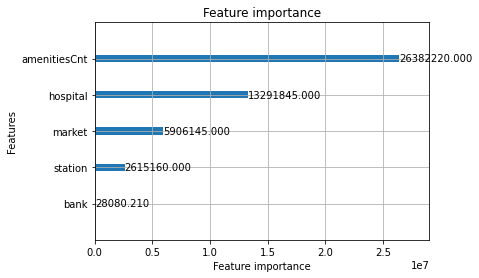

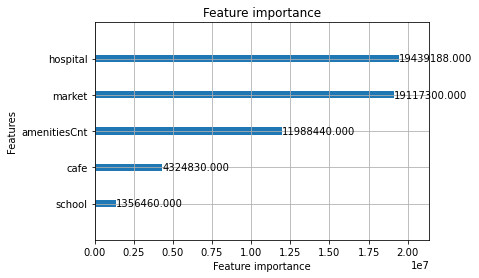

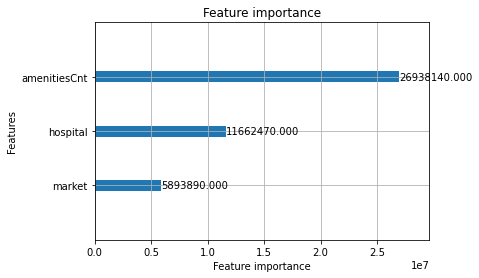

In [56]:
for model in models:
    lgb.plot_importance(model, importance_type='gain', max_num_features=5)

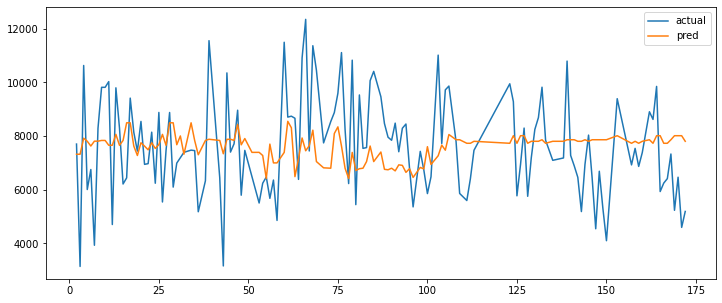

In [57]:
import matplotlib as plt

actual_pred_df.plot(figsize=(12,5))

In [58]:
df[df['amenitiesCnt'] == 0].groupby('danjigubn').mean()

,sedesu,eill,guard,clean,ellbe,gisa,giha,cctv,amenitiesCnt,areadaprice,market,school,station,bank,cafe,hospital
danjigubn,,,,,,,,,,,,,,,,
아파트,621.648649,6.351351,9.108108,6.405405,14.0,233.297297,495.891892,135.189189,0.0,4270.616216,3.702703,2.783784,1.702703,16.432432,40.486486,26.27027


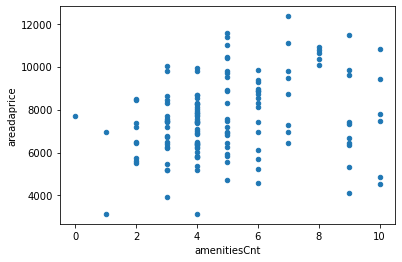

In [59]:
ipji_gangnam_num.plot.scatter(x='amenitiesCnt', y='areadaprice')

In [60]:
ipji_gangnam[(ipji_gangnam['amenitiesCnt'] > 4) & (ipji_gangnam['areadaprice'] > 6000)]

,gu,areadaprice,market,school,station,bank,cafe,hospital,amenitiesCnt
4,강남구,10629.0,4,5,3,6,12,11,8
13,강남구,9796.5,4,3,3,11,21,19,5
16,강남구,6441.0,5,4,2,13,40,35,5
17,강남구,9413.5,5,4,2,12,39,35,10
20,강남구,8544.7,2,3,1,17,9,15,6
22,강남구,6971.5,2,2,1,6,6,8,7
23,강남구,8144.0,1,3,1,1,0,1,6
24,강남구,6241.5,2,0,2,4,11,4,5
25,강남구,8879.2,2,1,2,14,38,33,6
28,강남구,8877.5,7,4,4,33,31,27,6


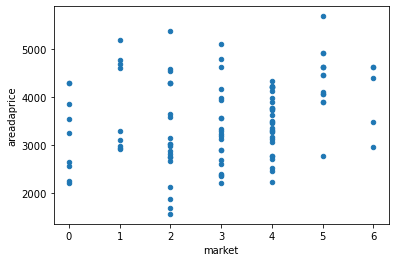

In [61]:
ipji_seongbuk.plot.scatter(x='market', y='areadaprice')

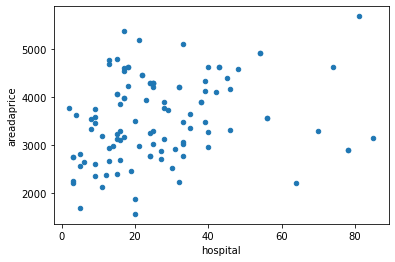

In [62]:
ipji_seongbuk.plot.scatter(x='hospital', y='areadaprice')

In [63]:
import numpy as np



In [64]:
ipji_seongbuk['hospital_1'] = round(ipji_seongbuk['hospital'],-1)

C:\Users\sonsj\AppData\Local\Temp/ipykernel_28484/1651153535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipji_seongbuk['hospital_1'] = round(ipji_seongbuk['hospital'],-1)


In [65]:
ipji_seongbuk

,gu,areadaprice,market,school,station,bank,cafe,hospital,amenitiesCnt,hospital_1
841,성북구,4067.7,5,6,0,16,23,15,4,20
842,성북구,4067.7,5,6,0,16,23,15,7,20
843,성북구,1694.0,2,8,2,13,14,5,3,0
844,성북구,4619.2,5,2,1,19,42,40,0,40
845,성북구,4444.7,5,3,1,13,31,22,8,20
...,...,...,...,...,...,...,...,...,...,...
2158,성북구,3757.0,4,1,1,17,20,28,4,30
2160,성북구,4295.4,2,1,1,9,22,25,5,20
2161,성북구,4295.4,2,1,1,9,22,25,4,20
2162,성북구,4295.4,2,1,1,9,22,25,8,20


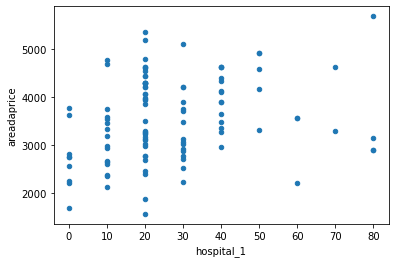

In [66]:
ipji_seongbuk.plot.scatter(x='hospital_1', y='areadaprice')

In [67]:
ipji_doro = df[['gu', 'areadaprice','market','school','station','bank', 'cafe', 'hospital','amenitiesCnt', 'doro']]

In [68]:
ipji_seongbuk_doro = ipji_doro[ipji_doro['gu']=='성북구']

In [69]:
c2 = ipji_seongbuk_doro[ipji_seongbuk['hospital_1'] == 20].sort_values(by='areadaprice')[:3]

In [70]:
c1 = ipji_seongbuk_doro[ipji_seongbuk['hospital_1'] == 10].sort_values(by='areadaprice')[:3]

In [71]:
b2 = ipji_seongbuk_doro[ipji_seongbuk['amenitiesCnt'] == 5].sort_values(by='areadaprice')[:3]

In [72]:
b1 = ipji_seongbuk_doro[ipji_seongbuk['amenitiesCnt'] == 4].sort_values(by='areadaprice')[:3]

In [73]:
a1 = ipji_seongbuk_doro[ipji_seongbuk['market'] == 3].sort_values(by='areadaprice')[:3]

In [74]:
a2 = ipji_seongbuk_doro[ipji_seongbuk['market'] == 4].sort_values(by='areadaprice')[:3]

In [75]:
df = pd.concat((a1, a2, b1, b2, c1, c2))

In [76]:
df.sort_values(by='doro')

,gu,areadaprice,market,school,station,bank,cafe,hospital,amenitiesCnt,doro
2141,성북구,2210.0,3,5,3,27,60,64,6,서울특별시 성북구 동소문로13길 47
2142,성북구,2525.0,4,7,3,12,43,30,3,서울특별시 성북구 동소문로31길 6-1
1703,성북구,2602.0,3,2,1,9,30,9,4,서울특별시 성북구 북악산로 742-12
1704,성북구,2356.5,3,2,1,9,25,9,4,서울특별시 성북구 북악산로 746
1704,성북구,2356.5,3,2,1,9,25,9,4,서울특별시 성북구 북악산로 746
1704,성북구,2356.5,3,2,1,9,25,9,4,서울특별시 성북구 북악산로 746
856,성북구,2669.0,2,7,3,7,23,13,4,서울특별시 성북구 북악산로 913
1711,성북구,2450.0,4,2,1,14,49,19,5,서울특별시 성북구 아리랑로 89
1711,성북구,2450.0,4,2,1,14,49,19,5,서울특별시 성북구 아리랑로 89
1712,성북구,2373.3,3,1,1,7,21,12,3,서울특별시 성북구 아리랑로19길 86


In [77]:
df[df.duplicated('doro')==True]

,gu,areadaprice,market,school,station,bank,cafe,hospital,amenitiesCnt,doro
1704,성북구,2356.5,3,2,1,9,25,9,4,서울특별시 성북구 북악산로 746
1711,성북구,2450.0,4,2,1,14,49,19,5,서울특별시 성북구 아리랑로 89
1704,성북구,2356.5,3,2,1,9,25,9,4,서울특별시 성북구 북악산로 746
1712,성북구,2373.3,3,1,1,7,21,12,3,서울특별시 성북구 아리랑로19길 86
2154,성북구,1882.7,2,3,6,23,51,20,5,서울특별시 성북구 안암로9길 30


In [78]:
data = ipji_seongbuk_doro[ipji_seongbuk['hospital_1'] == 20]['areadaprice']

In [79]:
data

841     4067.7
842     4067.7
845     4444.7
846     4444.7
852     5360.8
857     3295.2
859     4790.0
865     3020.7
1277    3965.0
1279    2769.9
1280    2769.9
1283    2682.0
1284    3278.0
1287    3218.0
1288    3128.0
1290    2392.0
1292    4199.0
1293    4539.0
1301    2978.0
1302    3938.0
1304    3099.0
1702    5186.7
1705    3157.0
1710    3978.0
1711    2450.0
1713    1562.0
1714    3503.1
1725    3848.0
1726    4297.0
1727    4297.0
2136    4629.4
2137    4629.4
2139    4608.0
2150    4216.0
2154    1882.7
2160    4295.4
2161    4295.4
2162    4295.4
2163    3251.0
Name: areadaprice, dtype: float64

In [80]:
mean = np.mean(data)
std = np.std(data)

In [81]:
mean

3713.558974358974

In [82]:
std

877.0098814512015

In [83]:
z_score = [(y-mean)/std for y in data]

In [84]:
z_score = pd.DataFrame(z_score)

In [85]:
z_score.columns = ['z_score']